### Угадываем признак

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


Посмотрим много ли в наших признаках пустых значений

In [5]:
data[ pd.isnull( data['height'] ) ].head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
12,258556239,Abbas Qali,IOA,male,10/11/92,NaN,NaN,aquatics,0,0,0
47,469953606,Abdoullah Bamoussa,ITA,male,6/8/86,NaN,NaN,athletics,0,0,0
50,325809293,Abdul Omar,GHA,male,10/3/93,NaN,NaN,boxing,0,0,0
52,262868423,Abdulaziz Alshatti,IOA,male,10/30/90,NaN,NaN,fencing,0,0,0
56,897549624,Abdullah Hel Baki,BAN,male,8/1/89,NaN,NaN,shooting,0,0,0


In [6]:
print('Для height пустых строк ' + str( len( data[ pd.isnull( data['height'] ) ] ) ))
print('Для weight пустых строк ' + str( len( data[ pd.isnull( data['weight'] ) ] ) ))
print('Для sport пустых строк ' + str( len( data[ pd.isnull( data['sport'] ) ] ) ))
print('Всего строк в наборе ' + str( len( data ) ))

Для height пустых строк 330
Для weight пустых строк 659
Для sport пустых строк 0
Всего строк в наборе 11538


In [7]:
data['height'].unique()

array([1.72, 1.68, 1.98, 1.83, 1.81, 1.8 , 2.05, 1.93, 1.65, 1.7 , 1.75,
        nan, 1.61, 1.78, 1.76, 2.1 , 1.73, 1.85, 1.77, 1.9 , 1.86, 1.74,
       1.6 , 2.07, 1.88, 1.66, 1.62, 1.87, 2.03, 1.69, 1.82, 1.89, 1.94,
       1.95, 1.71, 1.84, 1.91, 1.67, 2.02, 1.58, 1.63, 1.79, 1.97, 1.56,
       1.55, 1.57, 1.46, 1.92, 1.64, 1.53, 1.99, 1.96, 2.  , 2.04, 1.47,
       1.52, 2.01, 1.51, 1.59, 2.08, 1.37, 1.5 , 1.45, 2.06, 1.54, 2.11,
       1.43, 1.49, 1.33, 1.48, 1.44, 2.13, 2.09, 2.21, 2.18, 1.21, 1.38,
       1.34, 2.15, 2.17, 1.42, 1.4 , 2.14])

In [8]:
data = data[ pd.isnull( data['height'] ) == 0 ]
data = data[ pd.isnull( data['weight'] ) == 0 ]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Строим модель

In [11]:
features_columns = [c for c in data.columns if c != 'sex']
X = data[features_columns]
X.head(3)

,id,name,nationality,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,5/27/92,1.98,79.0,athletics,0,0,1


In [12]:
y = data['sex']

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

In [14]:
ft = ohe.fit_transform(data[['nationality', 'height', 'weight', 'sport', 'gold', 'silver', 'bronze']])

In [16]:
X = data[['height', 'weight', 'gold', 'silver', 'bronze']]
X.head(4)

,height,weight,gold,silver,bronze
0,1.72,64.0,0,0,0
1,1.68,56.0,0,0,0
2,1.98,79.0,0,0,1
3,1.83,80.0,0,0,0


In [17]:
le.fit( data['sex'] )

LabelEncoder()

In [18]:
y = pd.Series( data = le.transform( data['sex'] ) )
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int32

In [19]:
le.inverse_transform([0,1])

array(['female', 'male'], dtype=object)

In [20]:
model = LogisticRegression()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [22]:
model.fit(X_train, y_train)

LogisticRegression()

## Домашнее задание. Посчитать tpr и fpr в ноутбуке к лекции

### Оценим качество модели:

In [79]:
predictions = model.predict_proba(X_test)

In [177]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba(X_test)
for result_of_prediction, actual_value in zip(predictions[:,1], y_test):
    
    if result_of_prediction >= 0.5:
        predicted = 1
    else:
        predicted = 0
        
    if predicted == 1:
        if actual_value == 1:
            tp += 1
        else:
            fp += 1
        
    else:
        if actual_value == 1:
            fn += 1
        else:
            tn += 1

In [178]:
precision = tp / (tp + fp)
precision

0.7754629629629629

In [179]:
recall = tp / (tp + fn)
recall

0.7868467410452143

In [180]:
pred = model.predict(X_test)

In [181]:
from sklearn.metrics import recall_score, precision_score

In [182]:
recall_score(y_test, pred)

0.7868467410452143

In [183]:
precision_score(y_test, pred)

0.7754629629629629

#### Вывод: recall_score и precision_score работают верно, если принимается "условная вероятность" 0.5 (то есть для предсказанного класса при вероятности больше 0.5 проиходит округление до единицы. При изменеии этой вероятности, значения recall и precision не будут совпадать)

#### Убедиться, что график ROC AUC получается таким же, как и штатными средствами. Построить график Precision - Recall на этих же данных.

In [239]:
precision_manual = []
recall_manual = []
tpr_manual = []
fpr_manual = []
threshold = np.arange(0, 1, 0.005)
#threshold = [0.5]
predictions = model.predict_proba(X_test)

In [240]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

In [241]:
for value in threshold:
    
    for result_of_prediction, actual_value in zip(predictions[:,1], y_test):

        if result_of_prediction >= value:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual_value == 1:
                tp += 1
            else:
                fp += 1
        else:
            if actual_value == 1:
                fn += 1
            else:
                tn += 1
                
    precision_ = tp/(tp+fp)
    recall_ = tp/(tp+fn)
    tpr_ = tp/(tp+fn)
    fpr_ = fp/(fp+tn)

    precision_manual.append(precision_)
    recall_manual.append(recall_)
    tpr_manual.append(tpr_)
    fpr_manual.append(fpr_)
    
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative
    

In [242]:
import matplotlib.pyplot as plt

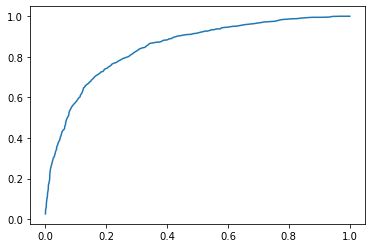

In [243]:
plt.plot(fpr_manual,tpr_manual)

In [244]:
from sklearn.metrics import roc_curve
predictions = model.predict_proba(X_test)
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1])

Text(0, 0.5, 'true positive rate')

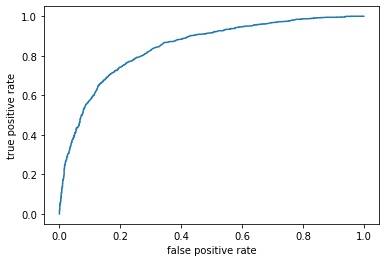

In [245]:
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

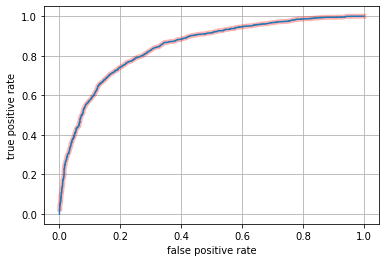

In [246]:
#сравним графики ручного расчета и при помощи функции
plt.plot(fpr_manual,tpr_manual, c = 'red', linewidth = 5, alpha = 0.3)
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.grid()
plt.show()

### График precision-recall

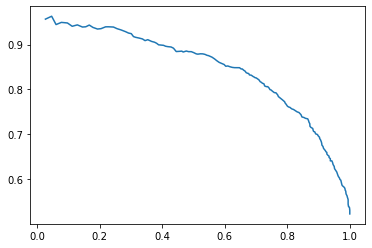

In [255]:
plt.plot(recall_manual, precision_manual)

In [252]:
from sklearn.metrics import precision_recall_curve

In [253]:
pr, re, thres = precision_recall_curve(y_test, predictions[:, 1] )

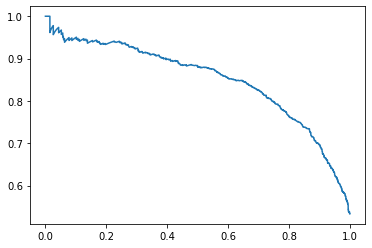

In [254]:
plt.plot(re,pr)

Text(0, 0.5, 'precision')

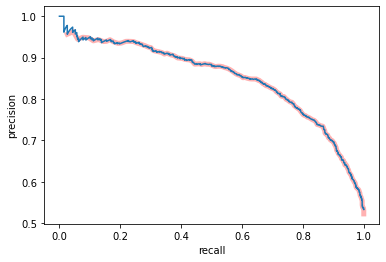

In [258]:
plt.plot(tpr_manual,precision_manual, c = 'red' , linewidth = 5, alpha = 0.3)
plt.plot(re,pr)
plt.xlabel('recall')
plt.ylabel('precision')